In [40]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 1000)

In [29]:
#WB share of population living in urban areas in 2019.
df = pd.read_xml('https://api.worldbank.org/v2/country/all/indicator/SP.URB.TOTL.IN.ZS?date=2019&format=xml&per_page=300')
df
#WB total population in 2019.
df1 = pd.read_xml('https://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL?date=2019&format=xml&per_page=300')
df1f = df1[df1['value'] > 20000000] #Filter df for countries with populations greater than 9 million people.

mdf = df.join(df1f.set_index('country'),on='country',rsuffix='_tot_pop',lsuffix='_sh_urb', how='inner')
mdf


,indicator_sh_urb,country,countryiso3code_sh_urb,date_sh_urb,value_sh_urb,unit_sh_urb,obs_status_sh_urb,decimal_sh_urb,indicator_tot_pop,countryiso3code_tot_pop,date_tot_pop,value_tot_pop,unit_tot_pop,obs_status_tot_pop,decimal_tot_pop
0,Urban population (% of total population),Africa Eastern and Southern,AFE,2019,36.291322,NaN,NaN,0,"Population, total",AFE,2019,6.600463e+08,NaN,NaN,0
1,Urban population (% of total population),Africa Western and Central,AFW,2019,47.242853,NaN,NaN,0,"Population, total",AFW,2019,4.469116e+08,NaN,NaN,0
2,Urban population (% of total population),Arab World,ARB,2019,59.201646,NaN,NaN,0,"Population, total",ARB,2019,4.278703e+08,NaN,NaN,0
4,Urban population (% of total population),Central Europe and the Baltics,CEB,2019,62.438139,NaN,NaN,0,"Population, total",CEB,2019,1.023985e+08,NaN,NaN,0
5,Urban population (% of total population),Early-demographic dividend,EAR,2019,45.540805,NaN,NaN,0,"Population, total",EAR,2019,3.290291e+09,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Urban population (% of total population),United States,USA,2019,82.459000,NaN,NaN,0,"Population, total",USA,2019,3.283300e+08,NaN,NaN,0
257,Urban population (% of total population),Uzbekistan,UZB,2019,50.433000,NaN,NaN,0,"Population, total",UZB,2019,3.358035e+07,NaN,NaN,0
259,Urban population (% of total population),"Venezuela, RB",VEN,2019,88.240000,NaN,NaN,0,"Population, total",VEN,2019,2.851583e+07,NaN,NaN,0
260,Urban population (% of total population),Vietnam,VNM,2019,36.628000,NaN,NaN,0,"Population, total",VNM,2019,9.646211e+07,NaN,NaN,0


In [30]:
#OWID covid19 dataset
owid = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/latest/owid-covid-latest.csv')
owid.columns

Index(['iso_code', 'continent', 'location', 'last_updated_date', 'total_cases',
       'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothe

In [54]:
#Merge the owid df with the wb df.
fmdf = pd.merge(mdf,owid,left_on='countryiso3code_sh_urb',right_on='iso_code',how='inner')
fmdf1 = fmdf.dropna(axis=1) #Drop columns with nan values.
fmdf1 = fmdf1.sort_values(by='gdp_per_capita',ascending=False)

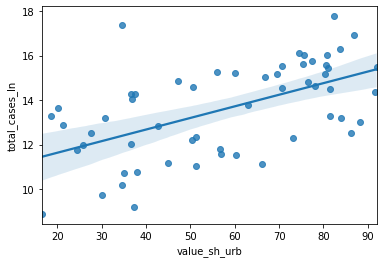

In [72]:
import seaborn as sns
fmdf1['total_cases_ln'] = np.log(fmdf1['total_cases'])
fmdf1['total_deaths_ln'] = np.log(fmdf1['total_deaths'])
sns.regplot(data=fmdf1[0:60],x='value_sh_urb',y='total_cases_ln')


fmdf1.to_csv(r'C:\Users\vw191\OneDrive\Documents\GitHub\107SBakst.github.io\data\covid_pop_urb.csv')

The Mean Squared Error is- 2395.7292843805244
Model slope:     [0.05208541]
Model intercept: [10.59685913]
Coefficients: 
 [[0.05208541]]
Variance score: 0.3160195570314126
Ttest_1sampResult(statistic=array([19.31768896]), pvalue=array([1.95301873e-26]))


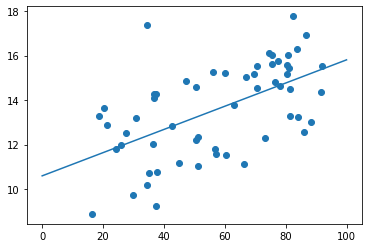

In [71]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
model = LinearRegression(fit_intercept=True)

data = fmdf1[0:60]
x = data[['value_sh_urb']]
y = data[['total_cases_ln']]

model.fit(x, y)

xfit = np.linspace(0, 100, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)

from sklearn.metrics import mean_squared_error 
print("The Mean Squared Error is- {}".format(mean_squared_error(x, y))) 

from sklearn.metrics import r2_score

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

print('Coefficients: \n', model.coef_) #Shows the coefficients of the 3 regressors used in the model.
print('Variance score: {}'.format(model.score(x, y)))
import scipy
from scipy import stats
print(scipy.stats.ttest_1samp(x,popmean=0))